# Distribuciones estadísticas
Vamos a estudiar las distintas distribuciones estadísticas que nos podemos encontrar a la hora de analizar datos. Para ello vamos a realizar un primer acercamiento teórico y posteriormente utilizaremos datos para comprobar o averiguar a que distribuciones se ajustan.

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# set seaborn style
sns.set()

In [2]:
"""Funciones especiales"""

# Importamos la biblioteca necesaria para enlazar con el archivo requerido
import sys
sys.path.insert(0, '../statistics')

# importamos la función que necesitamos
from functions import ecdf
from functions import freedman_diaconis as n_bins

# Generadores de números aleatorios

Vamos a examinar la biblioteca **Numpy.random**

### numpy.random.rand
**np.random.rand** nos da valores aleatorios en la forma que le indiquemos, y nos devuelve un array de valores *uniformemente distribuidos*.

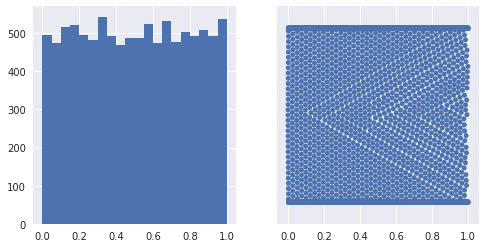

In [3]:
# Abrimos una figura
plt.figure(figsize=(8,4))

# numpy.random.rand(dn:int)
array = np.random.rand(10000)

# Visualizamos realizando tanto un histograma como un swarm plot
plt.subplot(1,2,1)
plt.hist(array, bins=20)

# swarm plot
array = np.random.rand(10000)

plt.subplot(1,2,2)
sns.swarmplot(x=array)

# mostramos el gráfico
plt.show()

Este gráfico nos permite comparar la forma de ambas gráficas, y conseguir un mejor entendimiento de la segunda que puede ser menos intuitiva.
Aquí vemos como ambos *sets* de números siguen una distribución uniforme. Como podemos observar el segundo gráfico presenta problemas de interpretabilidad debido al alto número de puntos que contiene.

### numpy.random.randn
**numpy.random.randn** nos devuelve valores aleatorios distribuidos conforme a la *distribución normal o gaussiana.*

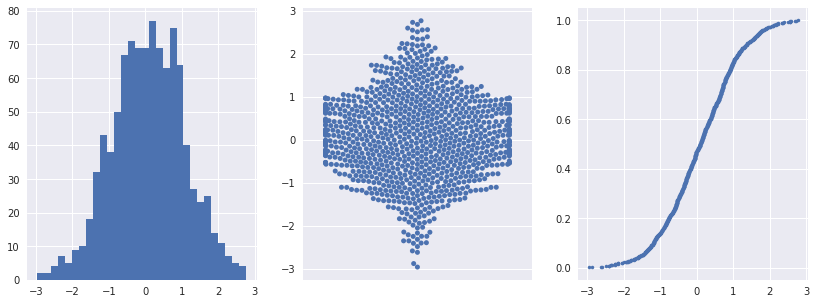

In [4]:
# creamos un array
array = np.random.randn(1000)

# visualizamos el contenido
plt.figure(figsize=(14,5))

# histograma
plt.subplot(1,3,1)
plt.hist(array, bins=30)

# Swarm plot
plt.subplot(1,3,2)
sns.swarmplot(y=array)

# ECDF
x, y = ecdf(array)

# Cumulative distribution function
plt.subplot(1,3,3)
plt.plot(x,y, marker='.', linestyle='none')

# mostramos los gráficos
plt.show()

Aquí podemos visualizar que forma tiene la distribución gausiana. Vemos que para el gráfico *bee swarm* o gráfica de **colmena** los puntos se agrupan alrededor de 0 y disminuye en los extremos, justo lo esperado por una distribución continua.

### numpy.random.randint
Devuelve enteros aleatorios desde un mínimo (incluido) hasta un máximo (también incluido)
Los valores devueltos son enteros que forman una *distribución discreta uniforme*.

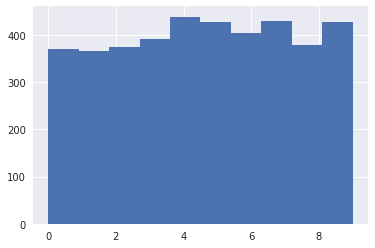

In [5]:
# creamos el array de datos
array = np.random.randint(low=0, high=10, size=4000)

# histograma
plt.hist(array)
plt.show()

## Selectores de números procedentes de un array

Aquí vamos a ver dos métodos que contiene **numpy** para realizar variaciones y permutaciones de un array.

In [6]:
# Creamos un array de enteros
array = np.array([0, 1, 2, 3, 4, 5])
array00 = np.array([0,1,2,3])

# Usamos
array1 = np.random.choice(array)
np.random.shuffle(array00)
array3 = np.random.permutation(array)

# Visualizamos los elementos
print("Elemento escogido usando np.ramdom.choice: ", array1)
print("Resultado de np.random.shuffle: ", array00)
print("Resultado de np.random.permutation: ", array3)

Elemento escogido usando np.ramdom.choice:  1
Resultado de np.random.shuffle:  [0 2 1 3]
Resultado de np.random.permutation:  [2 3 0 4 5 1]


Como podemos ver **np.random.shuffle** y **np.random.permutation** son parecidos, aunque no se pueden aplicar en el mismo contexto.

Si quisiéramos realizar una variación con repetición tendremos que hacer un bucle con la función **np.random.choice** y el tamaño del array resultante será igual al número de veces que se realice el bucle.

#### np.random.choice

Dicho comando tiene mayores utilidades que pueden hacer extender su uso a los otros dos comandos. Veamos su sintaxis:

np.random.choice( a:*array-like*,
                  size: *int or tuple of inst*
                  replace:*boolean*
                  p:*array-like* )

* a: si es un *ndarray*, un *random sample* es generado desde sus elementos. Si es un *int*, el *random sample* es generado como si fuese *np.arange(a)*.
* size: forma de la salida. Si el le damos un valor, este tendrá la forma $m \cdot n \cdot k$. Default es *None*, en cuyo caso es devuelto un solo valor.
* replace: especifica si los valores son con o sin repetición.

In [7]:
# Creamos un array de enteros
array = np.array([0, 1, 2, 3, 4, 5])

# Usamos
array0 = np.random.choice(array, size=len(array), replace=True)
array1 = np.random.choice(array, replace=True)
array2 = np.random.choice(array, replace=False)
array3 = np.random.choice(array, replace=False, p=[0.1, 0.2, 0.1, 0.1, 0.1, 0.4])

# Visualizamos los elementos
print("Resultado con repetición de todos los valores con probabilidad homogénea: ", array0)
print("Resultado con repetición y probabilidad homogénea: ", array1)
print("Resultado sin repetición y probabilidad homogénea: ", array2)
print("Resultado sin repetición y con diferente probabilidad: ", array3)

Resultado con repetición de todos los valores con probabilidad homogénea:  [1 1 4 4 3 4]
Resultado con repetición y probabilidad homogénea:  3
Resultado sin repetición y probabilidad homogénea:  5
Resultado sin repetición y con diferente probabilidad:  0


# Distribuciones estadísticas

* <a href="#beta">Beta</a>
* <a href="#binomial">Binomial</a>
* <a href="#chisquare">Chisquare</a>
* <a href="#normal">Normal</a>
* <a href="#exp">Exponential</a>
* <a href="#poisson">Poisson</a>
* <a href="#normal">Estándar normal</a>
* <a href="#t">Estándar t</a>
* <a href="#dirichlet">Dirichlet</a>
* <a href="#laplce">Laplace</a>
* <a href="#log">Logistic</a>
* <a href="#mult">Multinomial</a>

<a id="beta"></a>
## Distribución beta
Caso especial de la distribución de **Dirichlet**, y relacionada con la distribución **gamma**.

En la inferencia bayesiana, la distribución beta es la distribución de probabilidad previa conjugada para las distribuciones Bernoulli, binomial, binomial negativa y geométrica. Por ejemplo, la distribución beta puede utilizarse en el análisis bayesiano para describir los conocimientos iniciales sobre la probabilidad de éxito, como la probabilidad de que un vehículo espacial complete con éxito una misión específica. La distribución beta es un modelo adecuado para el comportamiento aleatorio de porcentajes y proporciones.

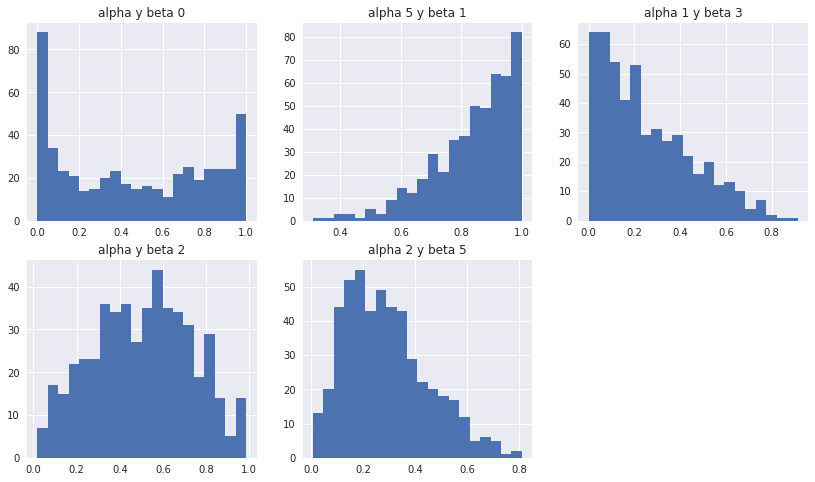

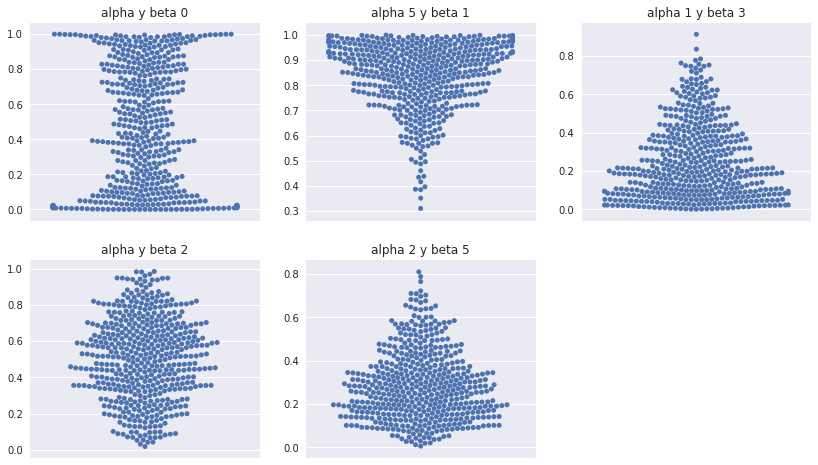

In [8]:
# Beta distribution
# Valores beta
alpha0 = beta0 = 0.5
alpha1 = 5
beta1 = 1
alpha2 = 1
beta2= 3
alpha3 = 2
beta3 = 2
alpha4 = 2
beta4 = 5

# arrays
array0 = np.random.beta(alpha0, beta0, size=500)
array1 = np.random.beta(alpha1, beta1, size=500)
array2 = np.random.beta(alpha2, beta2, size=500)
array3 = np.random.beta(alpha3, beta3, size=500)
array4 = np.random.beta(alpha4, beta4, size=500)

# dibujamos las distintas distribuciones
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
plt.title("alpha y beta 0")
plt.hist(array0, bins=20)
plt.subplot(2,3,2)
plt.title("alpha 5 y beta 1")
plt.hist(array1, bins=20)
plt.subplot(2,3,3)
plt.title("alpha 1 y beta 3")
plt.hist(array2, bins=20)
plt.subplot(2,3,4)
plt.title("alpha y beta 2")
plt.hist(array3, bins=20)
plt.subplot(2,3,5)
plt.title("alpha 2 y beta 5")
plt.hist(array4, bins=20)

# mostramos el gráfico
plt.show()

# dibujamos las distintas distribuciones en gráficos colmena
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
plt.title("alpha y beta 0")
sns.swarmplot(y=array0)
plt.subplot(2,3,2)
plt.title("alpha 5 y beta 1")
sns.swarmplot(y=array1)
plt.subplot(2,3,3)
plt.title("alpha 1 y beta 3")
sns.swarmplot(y=array2)
plt.subplot(2,3,4)
plt.title("alpha y beta 2")
sns.swarmplot(y=array3)
plt.subplot(2,3,5)
plt.title("alpha 2 y beta 5")
sns.swarmplot(y=array4)

# mostramos el último gráfico
plt.show()

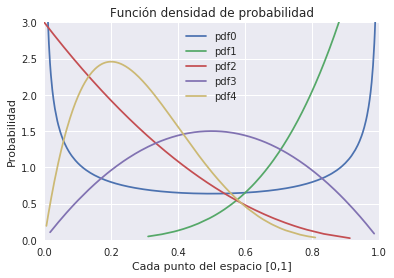

In [9]:
# También podemos visualizar su función densidad de probabilidad

# ordenamos los valores
array0.sort()
array1.sort()
array2.sort()
array3.sort()
array4.sort()

# probability distribution function
pdf0 = stats.beta.pdf(array0, alpha0, beta0)
pdf1 = stats.beta.pdf(array1, alpha1, beta1)
pdf2 = stats.beta.pdf(array2, alpha2, beta2)
pdf3 = stats.beta.pdf(array3, alpha3, beta3)
pdf4 = stats.beta.pdf(array4, alpha4, beta4)

# Realizamos las gráficas
plt.axis([0, 1, 0, 3])
#plt.figure(figsize=(8,5))
#plt.subplot(2,3,1)
plt.plot(array0, pdf0, label='pdf0')
#plt.subplot(2,3,2)
plt.plot(array1, pdf1, label='pdf1')
#plt.subplot(2,3,3)
plt.plot(array2, pdf2, label='pdf2')
#plt.subplot(2,3,4)
plt.plot(array3, pdf3, label='pdf3')
#plt.subplot(2,3,5)
plt.plot(array4, pdf4, label='pdf4')

# label
plt.title('Función densidad de probabilidad')
plt.xlabel('Cada punto del espacio [0,1]')
plt.ylabel('Probabilidad')
plt.legend()

# mostramos el gráfico
plt.show()

Recordamos que en teoría de la probabilidad, una función de probabilidad (también denominada función de masa de probabilidad) es una función que asocia a cada punto de su espacio muestral X la probabilidad de que ésta lo asuma.

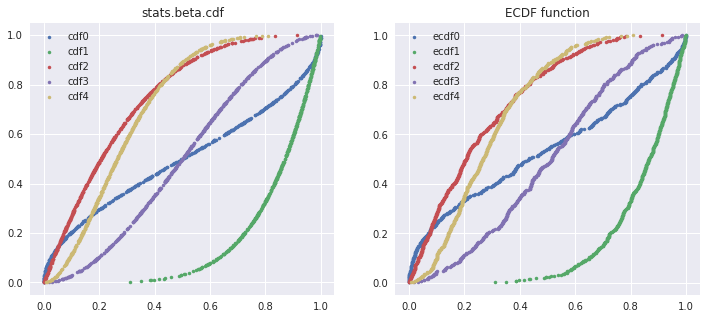

In [10]:
# Y también su función distribución de probabilidad
# probability distribution function
cdf0 = stats.beta.cdf(array0, alpha0, beta0)
cdf1 = stats.beta.cdf(array1, alpha1, beta1)
cdf2 = stats.beta.cdf(array2, alpha2, beta2)
cdf3 = stats.beta.cdf(array3, alpha3, beta3)
cdf4 = stats.beta.cdf(array4, alpha4, beta4)

plt.figure(figsize=(12,5))

# Realizamos las gráficas
plt.axis([0, 1, 0, 1])
plt.subplot(1,2,1)
plt.title('stats.beta.cdf')
plt.plot(array0, cdf0, label='cdf0', marker='.', linestyle='none')
plt.plot(array1, cdf1, label='cdf1', marker='.', linestyle='none')
plt.plot(array2, cdf2, label='cdf2', marker='.', linestyle='none')
plt.plot(array3, cdf3, label='cdf3', marker='.', linestyle='none')
plt.plot(array4, cdf4, label='cdf4', marker='.', linestyle='none')

# leyenda del gráfico
plt.legend()

# Comparamos con nuestra funcion ecdf
x0, y0 = ecdf(array0)
x1, y1 = ecdf(array1)
x2, y2 = ecdf(array2)
x3, y3 = ecdf(array3)
x4, y4 = ecdf(array4)

# realizamos los gráficos
plt.subplot(1,2,2)
plt.title('ECDF function')
plt.plot(x0, y0, label='ecdf0', marker='.', linestyle='none')
plt.plot(x1, y1, label='ecdf1', marker='.', linestyle='none')
plt.plot(x2, y2, label='ecdf2', marker='.', linestyle='none')
plt.plot(x3, y3, label='ecdf3', marker='.', linestyle='none')
plt.plot(x4, y4, label='ecdf4', marker='.', linestyle='none')

# opciones del gráfico
plt.legend()

# mostramos el gráfico
plt.show()

<a id="binomial"></a>
## Binomial
Distribución de probabilidad **discreta** que cuenta el número de éxitos en una secuencia de *n* ensayos de Bernoulli independientes entre sí, con una probabilidad fija *p* de ocurrencia del éxito entre los ensayos.

#### Relaciones con otras variables aleatorias
Si *n* tiende a infinito y *p* es tal que el producto entre ambos parámetros tienda a *lambda*, entonces la distribución de la variable aleatoria binomial tiende a una **distribución de Poisson** de parámetro *lambda*.

Por último, se cumple que cuando *p* = 0.5 y *n* es muy grande, la distribución binomial puede aproximarse mediante la **distribución normal**.

#### Numpy

Numpy nos permite obtener valores aleatorios procedentes de una distribución binomial. Para ello especificamos tanto *n* como *p* así como tu tamaño.

#### Scipy

Scipy nos permite calcular:
* pmf(k:array, *args:shape parameters distribution): probability mass function.
* cdf(k:array, *args:shape parameters distribution): cumulative distribution function.

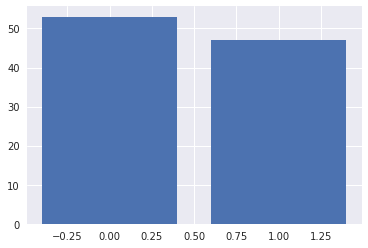

In [11]:
# Generamos un array con numpy
array0 = np.random.binomial(n=1, p=0.5, size=100)

# contamos los sucesos
values_count = np.bincount(array0)

# distribución de los valores
plt.bar([0,1], values_count)

# mostramos el gráfico
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10]


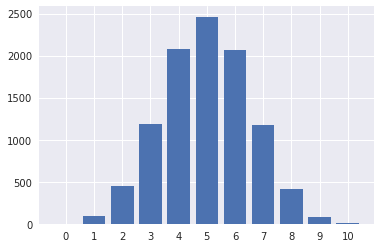

In [12]:
# Generamos un array con numpy
array2 = np.random.binomial(n=10, p=0.5, size=10000)

# contamos los sucesos
values_count = np.unique(array2, return_counts=True)

# distribución de los valores
print(values_count[0])
plt.bar(values_count[0], values_count[1])

# label
plt.xticks(values_count[0])

# mostramos el gráfico
plt.show()

#### Función de probabilidad

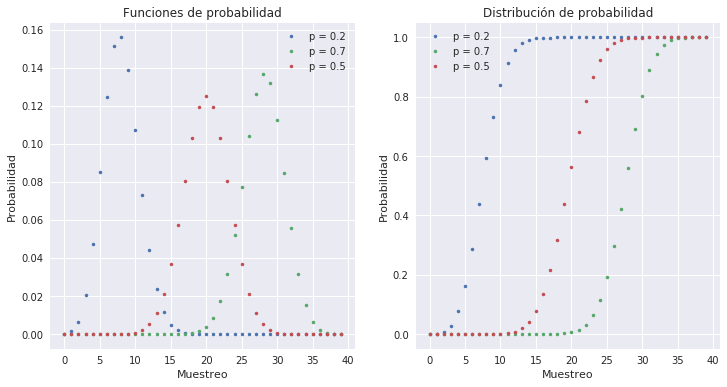

In [13]:
# definimos las probabilidades
p0, n0 = 0.2, 40
p1, n1 = 0.7, 40
p2, n2 = 0.5, 40

# calculamos la función de probabilidad
k0 = np.arange(n0)
k1 = np.arange(n1)
k2 = np.arange(n2)

# función de probabilidad
pmf0 = stats.binom.pmf(n=n0, p=p0, k=k0)
pmf1 = stats.binom.pmf(n=n1, p=p1, k=k1)
pmf2 = stats.binom.pmf(n=n2, p=p2, k=k2)

# visualizamos
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(k0, pmf0, marker='.', linestyle='none', label='p = 0.2')
plt.plot(k1, pmf1, marker='.', linestyle='none', label='p = 0.7')
plt.plot(k2, pmf2, marker='.', linestyle='none', label='p = 0.5')

# label the axes
plt.ylabel('Probabilidad')
plt.xlabel('Muestreo')
plt.title('Funciones de probabilidad')
plt.legend()

# Realizamos ahora la distribución de probabilidad
cdf0 = stats.binom.cdf(n=n0, p=p0, k=k0)
cdf1 = stats.binom.cdf(n=n1, p=p1, k=k1)
cdf2 = stats.binom.cdf(n=n2, p=p2, k=k2)

# realizamos los gráficos correspondientes
plt.subplot(1,2,2)
plt.plot(k0, cdf0, marker='.', linestyle='none', label='p = 0.2')
plt.plot(k1, cdf1, marker='.', linestyle='none', label='p = 0.7')
plt.plot(k2, cdf2, marker='.', linestyle='none', label='p = 0.5')

# label the axes
plt.ylabel("Probabilidad")
plt.xlabel("Muestreo")
plt.title("Distribución de probabilidad")
plt.legend()

# mostramos el gráfico
plt.show()

In [14]:
# Sumamos probabilidades
suma_prob = pmf1[0:31].sum()

# imprimimos
print("La suma de probabilidades hasta el valor 30 es: ", suma_prob)

La suma de probabilidades hasta el valor 30 es:  0.8040745762228779


En el ejercicio anterior podemos entender como funciona cada concepto. La primera gráfica muestra los valores resultantes de aplicar la función de probabilidad a cada punto, y el resultado es la probabilidad para dicho punto. Ahora la gráfica de la derecha, la distribución de probabilidad acumulada, es la suma de las probabilidades hasta dicho punto.
Podemos comprobar mirando la probabilidad para el punto **30** en la gráfica de la izquierda que su probabilidad esta acotada entre 0.10 y 0.12. Si sumamos las probabilidades de todos los puntos anteriores a este obetenemos una probabilidad del **80%**, que es justo lo que nos muestra el gráfico derecho.
La *interpretación* de estas gráficas es clara, la primera nos muestra las probabilidades de ocurrencia de cada número de muestras, mientras que la segunda nos muestra la probabilidad de que ocurra **al menos una vez** (se entiende que el resultado que buscamos), para el número de muestras realizadas.

<a id="chisquare"></a>
### Distribución Chi cuadrado

La distribución de Pearson, llamada también ji cuadrada(o) o chi cuadrado(a) (χ²), es una distribución de probabilidad continua con un parámetro *k*, que representa los grados de libertad de la variable aleatoria.

La distribución de Pearson o Chisquare (por su nombre en inglés) es un caso especial de la **distribución gamma** y una de las más utilizadas en estadística inferencial, por ejemplo en: testeo de hipótesis (hypothesis testing), o en calcular intervalos de confianza.

La distribición Chisquared es comúnmente usada para:

* Pruebas de independencia en tablas de contingencia (contingency tables)
* Bondad de ajuste para datos observados a distribuciones hipotéticas.
* Estimación de los intervalos de confianza para una muestra con una distribución normal procedente de una muestra con desviación estándar.


La razón principal por la que la distribución chi-cuadrado se usa ampliamente en las pruebas de hipótesis (hypothesis testing) es su relación con la **distribución normal**. 

Muchas pruebas de hipótesis usan un estadístico de prueba (test stadistic), como *t-statistic* en una prueba t (t-test). Para estas pruebas de hipótesis, a medida que aumenta el tamaño de la muestra, n, la distribución muestral del estadístico de prueba se acerca a la *distribución normal* (teorema del límite central). Debido a que la estadística de prueba (como t) se distribuye asintóticamente, siempre que el tamaño de la muestra sea suficientemente grande, la distribución utilizada para la prueba de hipótesis puede aproximarse mediante una *distribución normal*. La prueba de hipótesis usando una distribución normal se *entiende bien y es relativamente fácil*. La distribución chi-cuadrado más simple es el cuadrado de una distribución normal estándar. Entonces, donde sea que se use una *distribución normal* para una prueba de hipótesis, se podría usar una **distribución chi-cuadrado.**

#### Módulo Numpy Random, numpy.random.chisquare(df, size=none)

Draw samples from a chi-square distribution.

**df**: number of degrees of freedom.

**size**: output shape. If the given shape is e.g., $(m, n, k)$, then $m \cdot n \cdot k$ samples are drawn. If size is *None* (default), a single value is returned if *df* is a scalar.


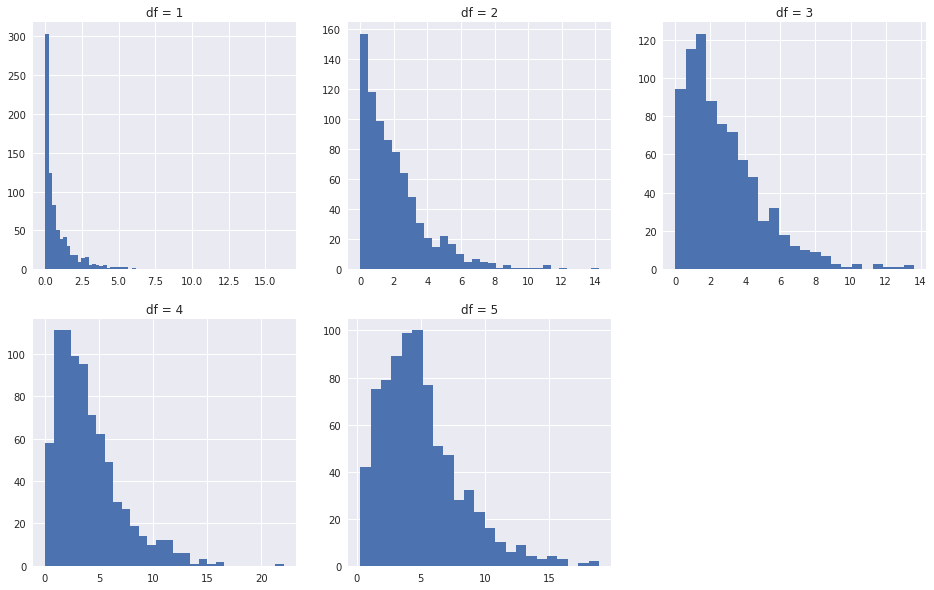

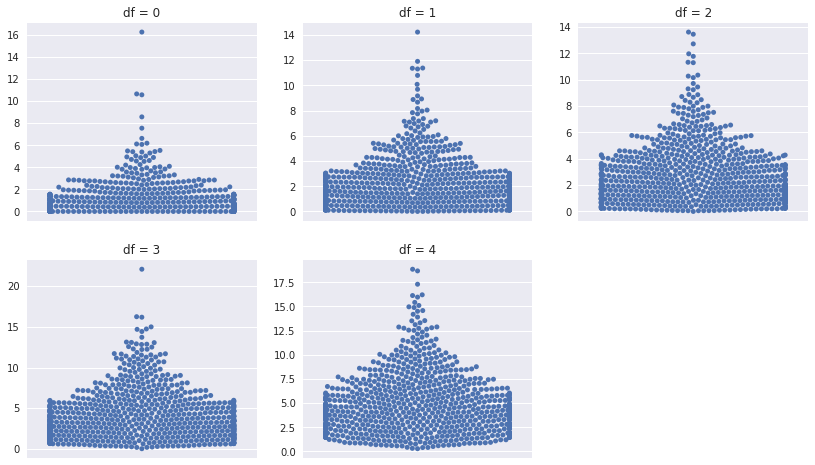

In [15]:
# Representamos distintos grados de libertad
df = [1,2,3,4,5]

# arrays
array0 = np.random.chisquare(df[0], 800)
array1 = np.random.chisquare(df[1], 800)
array2 = np.random.chisquare(df[2], 800)
array3 = np.random.chisquare(df[3], 800)
array4 = np.random.chisquare(df[4], 800)

# histogramas y gráficas de colmena
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
plt.title("df = 1")
plt.hist(array0, bins=n_bins(array0))

plt.subplot(2,3,2)
plt.title("df = 2")
plt.hist(array1, bins=n_bins(array1))

plt.subplot(2,3,3)
plt.title("df = 3")
plt.hist(array2, bins=n_bins(array2))

plt.subplot(2,3,4)
plt.title("df = 4")
plt.hist(array3, bins=n_bins(array3))

plt.subplot(2,3,5)
plt.title("df = 5")
plt.hist(array4, bins=n_bins(array4))

# mostramos el gráfico
plt.show()

# gráficos colmena
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
plt.title("df = 0")
sns.swarmplot(y=array0)

plt.subplot(2,3,2)
plt.title("df = 1")
sns.swarmplot(y=array1)

plt.subplot(2,3,3)
plt.title("df = 2")
sns.swarmplot(y=array2)

plt.subplot(2,3,4)
plt.title("df = 3")
sns.swarmplot(y=array3)

plt.subplot(2,3,5)
plt.title("df = 4")
sns.swarmplot(y=array4)

# mostramos el gráfico
plt.show()